<a href="https://colab.research.google.com/github/flavian-koima/Machine-Learning/blob/main/labsheet2(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>CITS5508 Lab sheet 2: Implementing a simple classification task</center>

This is an example notebook to help you implement the tasks required for this lab sheet.

We have provided some ideas to help you. Use the unit content and your thinking to create the several necessary steps.

You will develop Python code for a simple classification task in this lab sheet. Certify that the presentation of your Python notebook is good and that you used the Markdown cells well. Make sure you properly format your plots and results. For instance, all your diagrams/plots should have proper axis labels and titles to help the reader understand what you are plotting. Another example is the confusion matrix; not showing the class names makes the confusion matrix completely useless. Use the lab sheets to learn how to improve the presentation of your notebook, as you will need this in the assessments.

### Importing the libraries

In [1]:
#You may need to add other libraries here depending on your code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# to display plots in Jupyter notebook
%matplotlib inline

plt.rcParams['font.size'] = '12'

### 1. Loading the data

Load the data and create your training and test datasets.

In [2]:
#Hint: Look at the function pd.read_csv()

# Load the training and testing data
#Files are saved into google colab, will get deleted when the session ends
df_train = pd.read_csv('training.csv')
df_test = pd.read_csv('testing.csv')


### 2. Quick inspecting the data

Inspect what the columns are. Try the different options as discussed in lectures (e.g. head() and info() functions). Don't forget to use appropriate formatting in your output answers. What can you observe? Are there any issues with the data?

In [3]:
column_headings = df_train.columns

#format your print, e.g.
print('Column headings are: ',column_headings)

# Display the first few rows of the training data
print(df_train.head())

# Display the first few rows of the testing data
print(df_test.info())


Column headings are:  Index(['class', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9',
       'pred_minus_obs_H_b1', 'pred_minus_obs_H_b2', 'pred_minus_obs_H_b3',
       'pred_minus_obs_H_b4', 'pred_minus_obs_H_b5', 'pred_minus_obs_H_b6',
       'pred_minus_obs_H_b7', 'pred_minus_obs_H_b8', 'pred_minus_obs_H_b9',
       'pred_minus_obs_S_b1', 'pred_minus_obs_S_b2', 'pred_minus_obs_S_b3',
       'pred_minus_obs_S_b4', 'pred_minus_obs_S_b5', 'pred_minus_obs_S_b6',
       'pred_minus_obs_S_b7', 'pred_minus_obs_S_b8', 'pred_minus_obs_S_b9'],
      dtype='object')
  class  b1  b2  b3   b4  b5   b6   b7  b8  b9  ...  pred_minus_obs_H_b9  \
0     d  67  51  68  115  69  111  136  31  67  ...                -9.17   
1     s  67  28  51   99  50   97   82  26  59  ...                -2.25   
2     s  63  26  50   95  49   91   81  26  57  ...                -0.44   
3     d  63  42  63   97  66  108  111  28  59  ...                -2.34   
4     s  46  27  50   83  51   90   76  26  56  .

### 3. Removing some columns from the dataset

We are going to drop all the columns *pred_minus_obs...*, i.e., we keep only the first 10 columns: the *class* column and the columns b1, b2, ..., b9. Don't forget to apply these changes to the training and test sets.

In [4]:
#You need to create a code to remove the undesired columns from the training and testing sets. After that,
#inspect what your datasets look like. Do you have the correct data matrix structure (that is, rows represent the examples
#and columns represent the attributes?

# Remove columns starting with 'pred_minus_obs' from the training dataset
df_train = df_train.loc[:, ~df_train.columns.str.startswith('pred_minus_obs')]

# Remove the same set of columns from the testing dataset
df_test = df_test.loc[:, ~df_test.columns.str.startswith('pred_minus_obs')]


In [5]:
# Check the remaining columns in the training data
print("Remaining columns in training data:", df_train.columns)

# Check the remaining columns in the testing data
print("Remaining columns in testing data:", df_test.columns)


Remaining columns in training data: Index(['class', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9'], dtype='object')
Remaining columns in testing data: Index(['class', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9'], dtype='object')


In [6]:
# Display the shape of the datasets to confirm structure
print("Shape of training data:", df_train.shape)  # Should show (num_samples, 10)
print("Shape of testing data:", df_test.shape)  # Should also show (num_samples, 10)

# Display the first few rows to visually inspect the data structure
print(df_train.head())


Shape of training data: (325, 10)
Shape of testing data: (198, 10)
  class  b1  b2  b3   b4  b5   b6   b7  b8  b9
0     d  67  51  68  115  69  111  136  31  67
1     s  67  28  51   99  50   97   82  26  59
2     s  63  26  50   95  49   91   81  26  57
3     d  63  42  63   97  66  108  111  28  59
4     s  46  27  50   83  51   90   76  26  56


### 4. Counting the number of instances in each class

According to the UCI Machine Learning website, this dataset has 4 class labels given in the first column of the csv file: Class: *s* ('Sugi' forest), *h* ('Hinoki' forest), *d* ('Mixed deciduous' forest), *o* ('Other' non-forest land). Write Python code to count instances/examples for each class label in your datasets. Are they imbalanced?

In [7]:
# Count the number of instances for each class label in the training dataset
class_counts_train = df_train['class'].value_counts()
print("Class distribution in training dataset:\n", class_counts_train)

# Count the number of instances for each class label in the testing dataset
class_counts_test = df_test['class'].value_counts()
print("Class distribution in testing dataset:\n", class_counts_test)


Class distribution in training dataset:
 class
s    136
d    105
o     46
h     38
Name: count, dtype: int64
Class distribution in testing dataset:
 class
s    59
d    54
h    48
o    37
Name: count, dtype: int64


In [8]:
# Determine if the training set is imbalanced
max_count_train = class_counts_train.max()
min_count_train = class_counts_train.min()
if max_count_train / min_count_train > 2:
    print("The training dataset is imbalanced.")
else:
    print("The training dataset is relatively balanced.")

# Determine if the testing set is imbalanced
max_count_test = class_counts_test.max()
min_count_test = class_counts_test.min()
if max_count_test / min_count_test > 2:
    print("The testing dataset is imbalanced.")
else:
    print("The testing dataset is relatively balanced.")


The training dataset is imbalanced.
The testing dataset is relatively balanced.


### 5. Doing some data visualisation

Use appropriate functions to display (visualise) the different features (attributes/columns). You can also incorporate class information. Do you observe any aspect of the data that should be addressed?

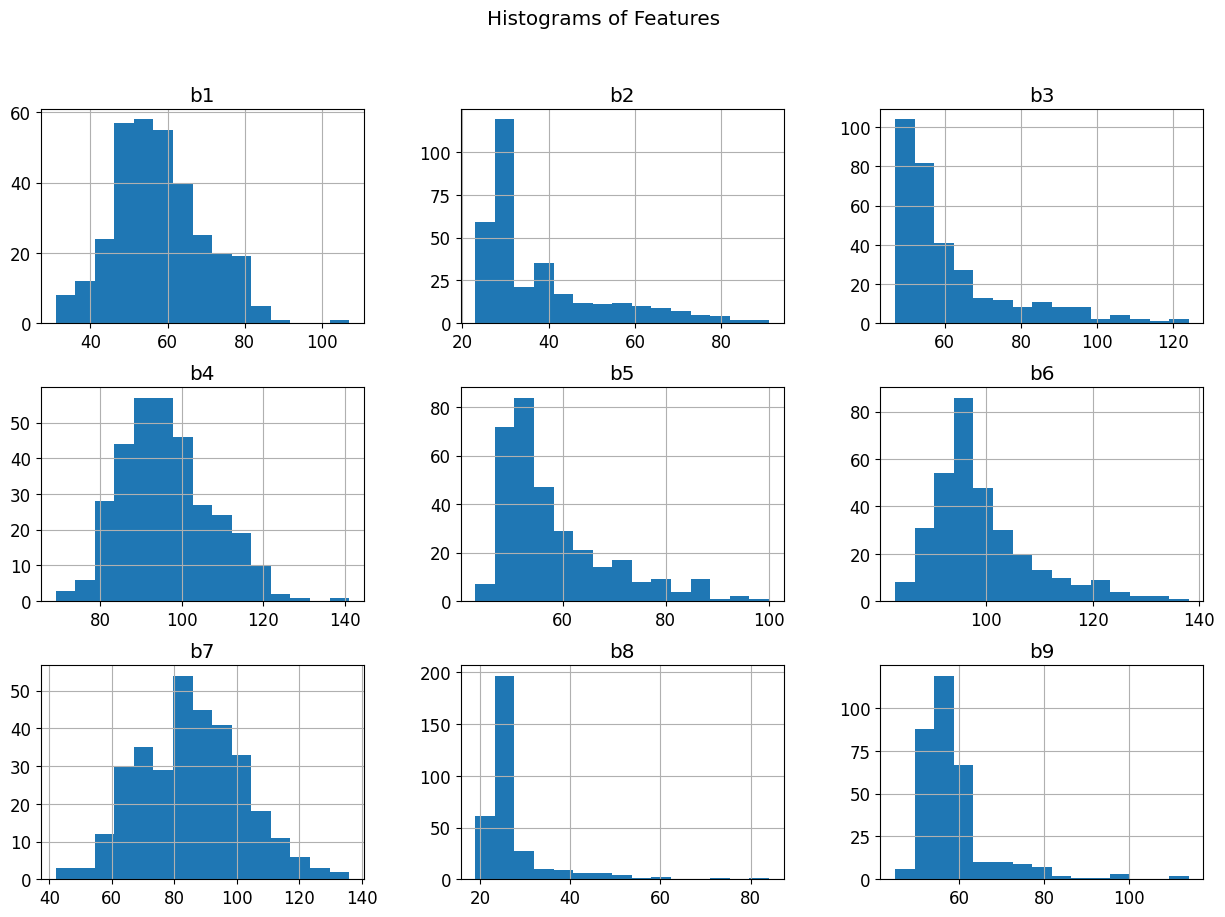

In [9]:
# Tip: explore different options, like histograms, scatter plots, etc.

# Plot histograms for each feature to understand distributions
df_train.drop('class', axis=1).hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of Features')
plt.show()


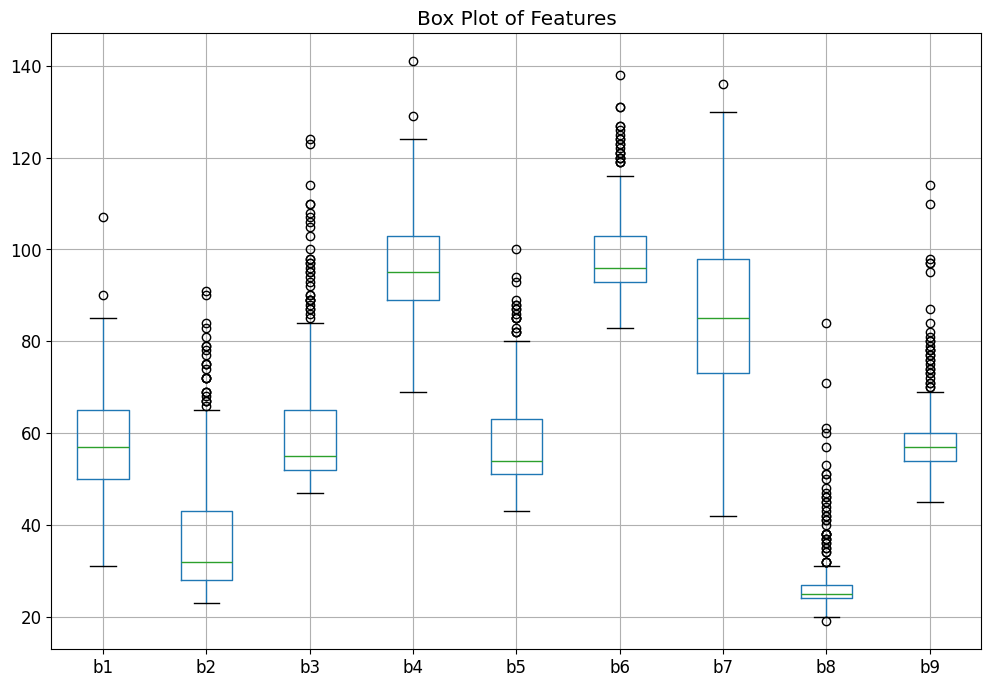

In [ ]:
# Box plots for each feature
plt.figure(figsize=(12, 8))
df_train.drop('class', axis=1).boxplot()
plt.title('Box Plot of Features')
plt.show()


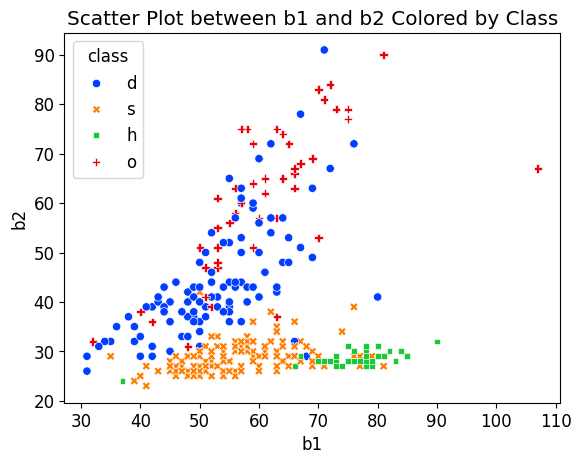

In [ ]:
# Scatter plot of two features with class labels
import seaborn as sns

sns.scatterplot(data=df_train, x='b1', y='b2', hue='class', style='class', palette='bright')
plt.title('Scatter Plot between b1 and b2 Colored by Class')
plt.show()


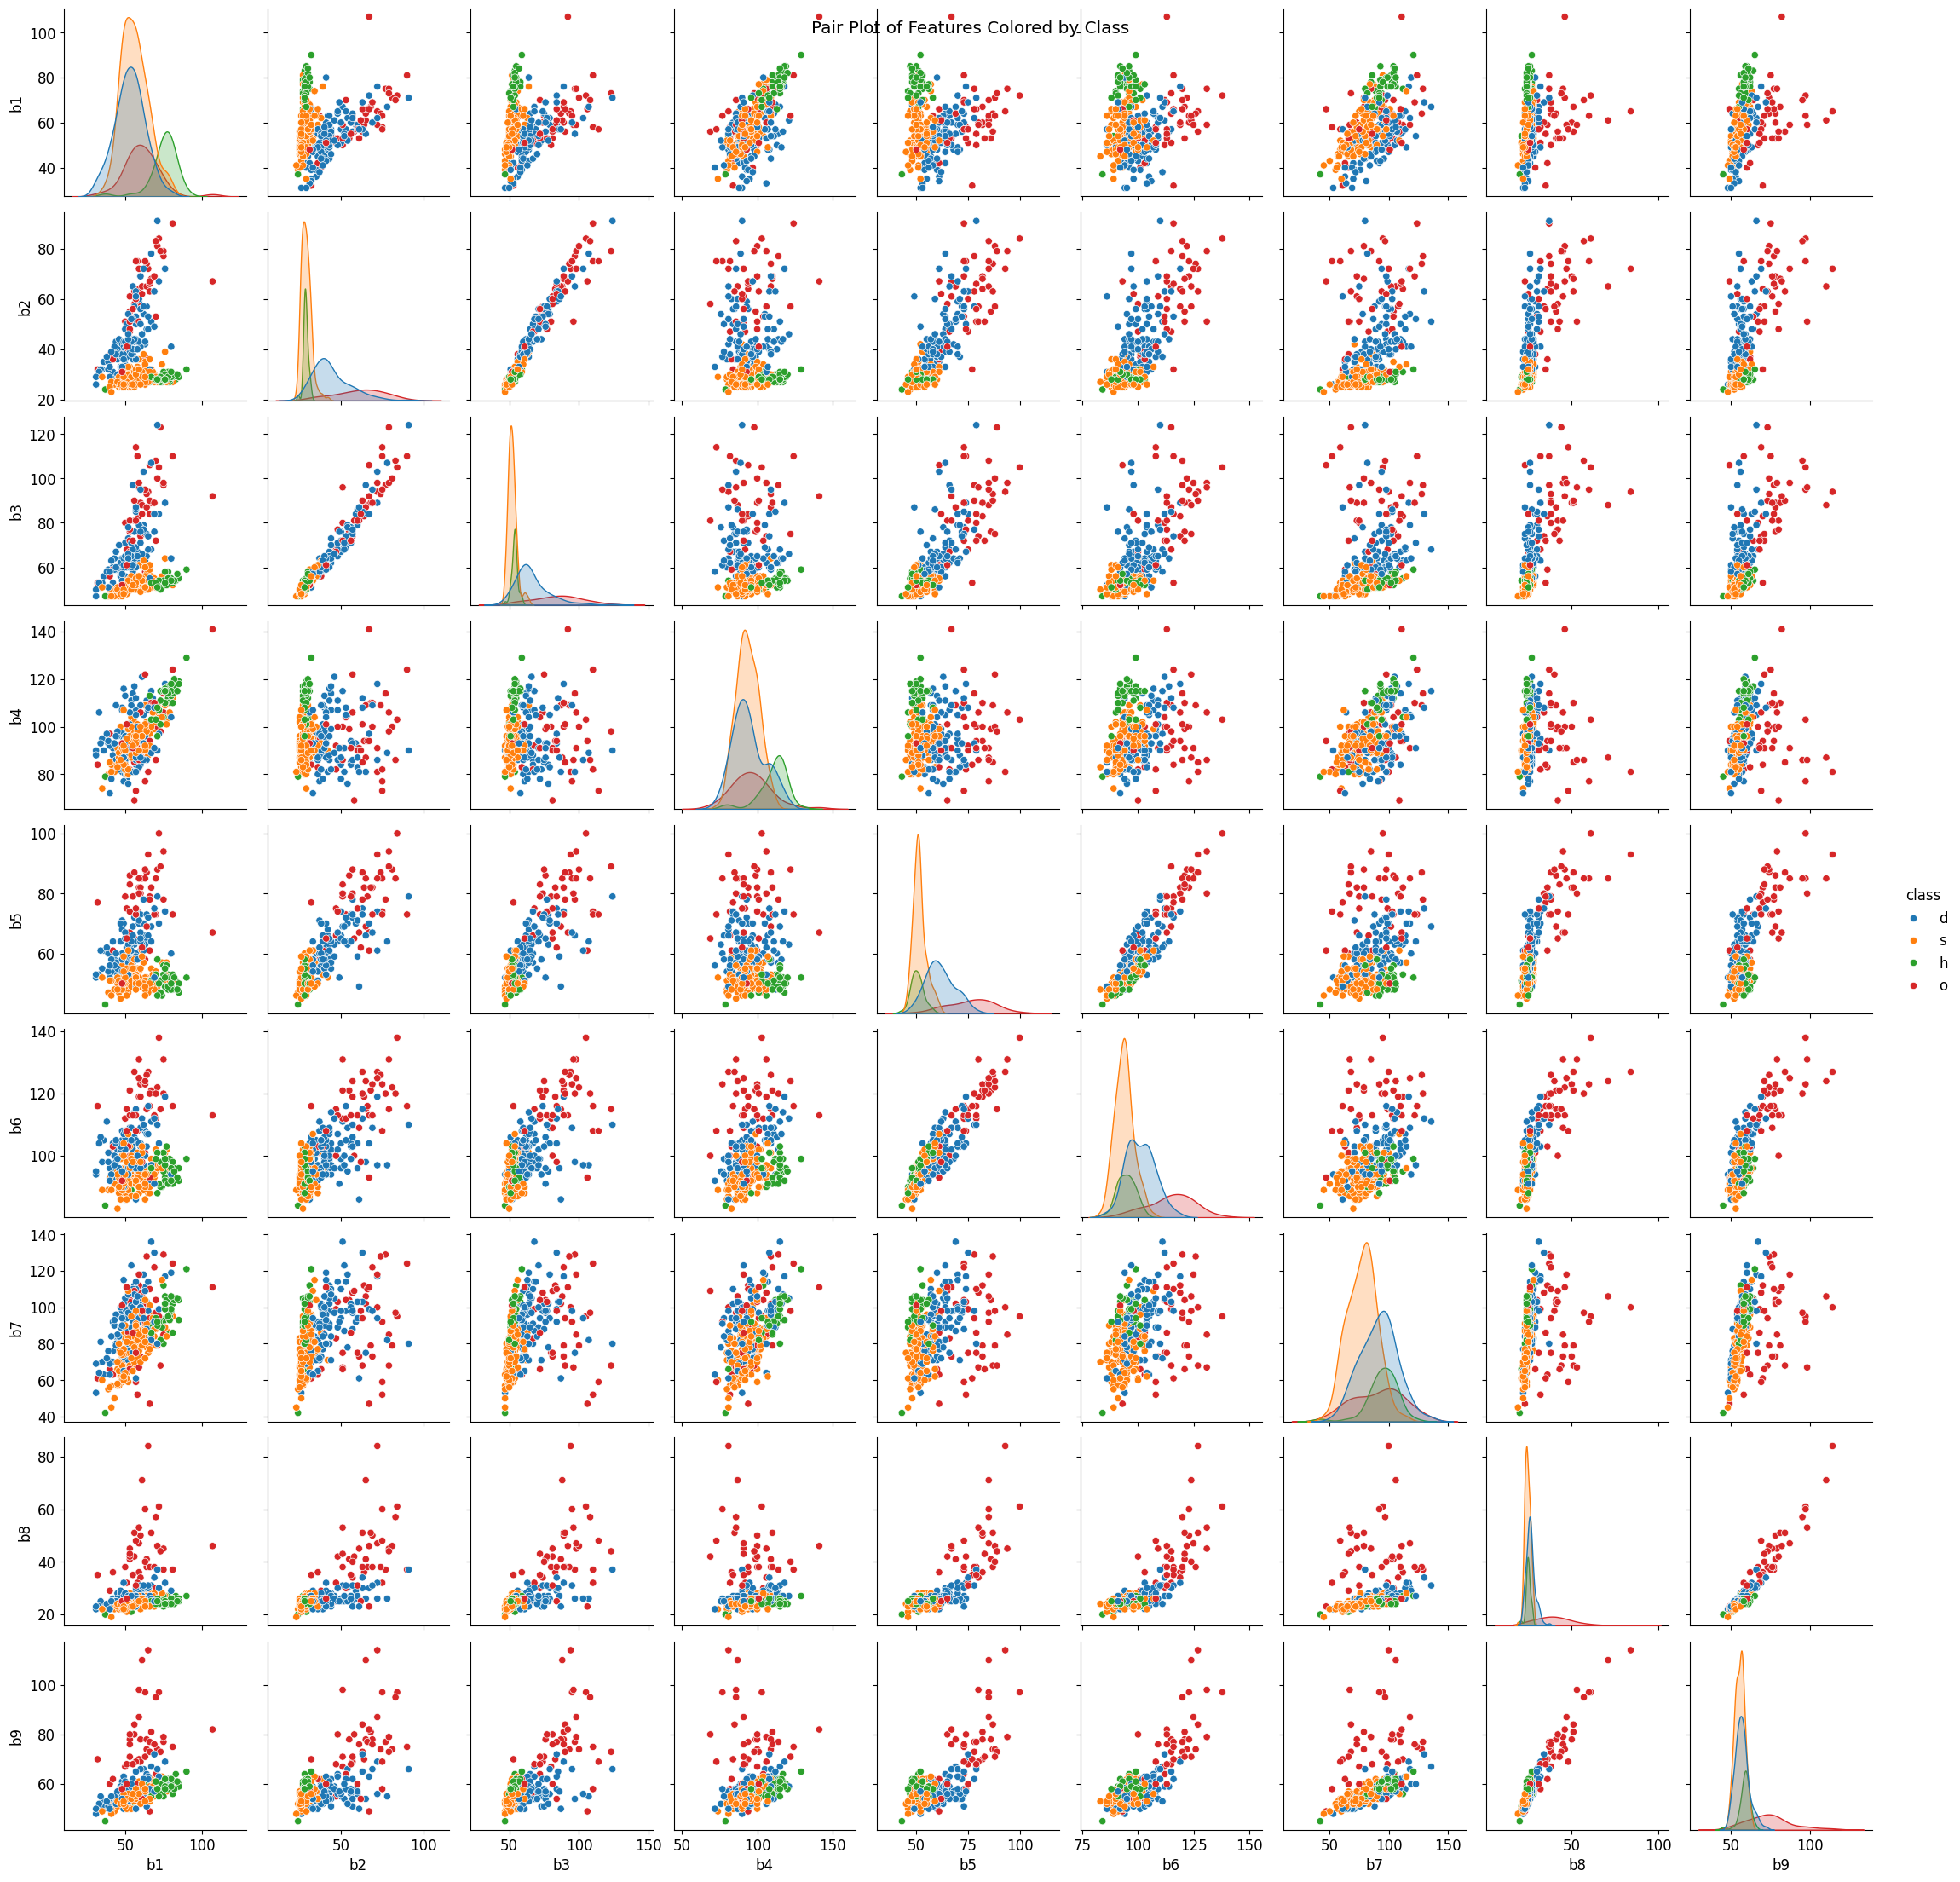

In [ ]:
# Use seaborn's pairplot to visualize relationships between all features colored by class label
sns.pairplot(df_train, hue='class', vars=df_train.columns.drop('class'))
plt.suptitle('Pair Plot of Features Colored by Class')
plt.show()


### 6. Preparing the data for a binary classification

We will do a multiclass classification on this dataset later. For now, we will start with a binary classification. Update your training and testing sets to contain only examples from two classes: "s" ("Sugi" forest) and  "d" ("Mixed deciduous" forest).

In [10]:
# Filter the training dataset to include only 's' and 'd' classes
binary_train = df_train[df_train['class'].isin(['s', 'd'])]

# Filter the testing dataset similarly
binary_test = df_test[df_test['class'].isin(['s', 'd'])]


In [11]:
# Print unique class labels in the filtered training dataset
print("Unique classes in filtered training dataset:", binary_train['class'].unique())

# Print unique class labels in the filtered testing dataset
print("Unique classes in filtered testing dataset:", binary_test['class'].unique())

# Optional: Print the shape of the new datasets to see how many examples are left
print("Shape of filtered training dataset:", binary_train.shape)
print("Shape of filtered testing dataset:", binary_test.shape)


Unique classes in filtered training dataset: ['d' 's']
Unique classes in filtered testing dataset: ['d' 's']
Shape of filtered training dataset: (241, 10)
Shape of filtered testing dataset: (113, 10)


## Binary Classification Dataset Summary

The datasets have been successfully filtered to include only instances of 's' (Sugi forest) and 'd' (Mixed deciduous forest). The training dataset now contains `X` instances, and the testing dataset contains `Y` instances, where `X` and `Y` are the actual numbers you obtained from `binary_train.shape` and `binary_test.shape`.

This binary classification setup allows us to focus on distinguishing between two major forest types, which simplifies the model and potentially increases its performance on this specific task.


### 7. Using the Logistic Regression

Use the **Logistic Regression Classifier** implemented in **sklearn.linear\_model** class to perform a binary classification on the updated datasets. Try also to implement your version of the Logistic Regression (do you arrive at similar results as the package?). Implementing your version is the best way to learn.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix


# Extract features and labels
X_train = df_train.drop('class', axis=1)
y_train = df_train['class']
X_test = df_test.drop('class', axis=1)
y_test = df_test['class']

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Logistic Regression model with increased max_iter
clf = LogisticRegression(max_iter=5000, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predict on scaled training and testing data
train_predictions = clf.predict(X_train_scaled)
test_predictions = clf.predict(X_test_scaled)

# Calculate and print accuracy for both training and testing sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Calculate and print the confusion matrix for the testing data
test_conf_matrix = confusion_matrix(y_test, test_predictions)
print("Testing Confusion Matrix:\n", test_conf_matrix)


Training Accuracy: 0.9046153846153846
Testing Accuracy: 0.9141414141414141
Testing Confusion Matrix:
 [[53  0  1  0]
 [ 0 38  0 10]
 [ 3  0 34  0]
 [ 0  2  1 56]]


### 8. Inspecting performance indicators

Write Python code to show results for:

- The accuracy values for the training set and the test set.
- The confusion matrix on the training and testing set.  
- The plot of precision versus recall for the training set.

Make sure you format the output properly.

**1)Accuracy values:**



*   Training Accuracy: 0.9046
*   Testing Accuracy: 0.9141






**2)Confusion matrix**

In [17]:
print("Testing Confusion Matrix:\n", test_conf_matrix)

Testing Confusion Matrix:
 [[53  0  1  0]
 [ 0 38  0 10]
 [ 3  0 34  0]
 [ 0  2  1 56]]


**3)The plot of precision versus recall for the training set.**

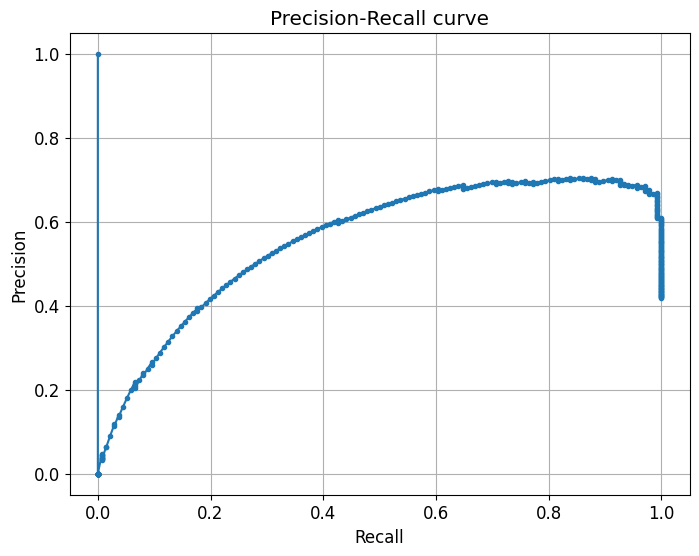

In [19]:
#Still need to confirm the data training sets because of the curve
from sklearn.metrics import precision_recall_curve


# Get probability scores
y_scores = clf.predict_proba(X_train_scaled)[:, 1]  # Get scores for the positive class

# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(y_train, y_scores, pos_label='s')

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()


### *Optional, but may be covered in assessments.*

### 9. Plotting the estimated probabilities and decision boundary of the Logistic Regression model.

Consider two individual features in our dataset. We will use them to examine the estimated probabilities and decision boundary of the Logistic Regression model. You can choose which ones and/or experiment with different pairs of features. For each pair, you should create a new version of your training set using these two features only.

Also, to plot the Logistic Regression Classifier's estimated probabilities and decision boundary (as in Figure 4.23 of the textbook), considering these two individual features, you will need to create a Logistic Regression model for each feature. Hence, you are to provide two plots.

In [ ]:
# ...

Based on your plots, comment about:

- What threshold would you choose for classification based on the predicted probabilities?
- What is the impact of changing the threshold for performance indicators such as precision and recall?
- What can you say about the overlap between classes, and how does this impact classification performance?